# 08.03 Non-Linearity

Another dataset of images are the MNIST handwritten digits.
This dataset is often used for algorithm benchmark due to its complexity.

Relevant to the digits is perhaps this man.
Since a lot of people consider him a number $1$,
and a lot of other people consider him a number $0$.

![Donald Trump](ul-orange-man-bad.svg)

<div style="text-align:right;"><sup>ul-orange-man-bad.svg</sup></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

We import and load the dataset.
Indeed we did see this dataset before, in the exercises for `matplotlib`.
In those exercises we attempted to plot four random features from the
set and attempt to make sense of them.

The dataset is made out out $64$ pixel ($8$ by $8$ pixels) images of
handwritten digits.
Now that we know that we understand every pixel as a feature we can easily
tell that picking $4$ pixels at random and then plotting these
$4$ pixel values out of several $64$ pixel images will *not*
provide us with a good description of the image.
Indeed, that exercise was impossible to complete.
Unfortunately, it is a fact of life that some tasks are just impossible,
and exercises are no different.
Hopefully it makes one re-evaluate randomly given exercises.

Nevertheless, we are now in a possession of a better technique, PCA.
We could attempt to find a good projection and then plot features from that projection.
On the other hand we did see that the written letter B has non-linear features/patterns,
and that PCA would not be capable of identifying those.
We will need to explore and find the answer as to whether we can describe
the digits dataset in fewer *linear* dimensions.

In [2]:
digits = load_digits()
print(digits['DESCR'])
digits.data.shape, digits.images.shape

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

((1797, 64), (1797, 8, 8))

---

The number of dimensions ($64$) in this dataset is much smaller
than in the faces dataset.
Moreover, we know very well the labels: digits from $0$ to $9$.
We may as well try to visualize the distribution of each digit.
For a start we'll try to reduce the digits to a representation in two dimensions,
since two dimensions are particularly easy to visualize.
We then use the labels as a third dimension to check whether
we have patters that distinguish, say, $3$ from $7$.

These are $8$ pixels by $8$ pixels images.
As we did with the faces we can plot them to see what we are working with.

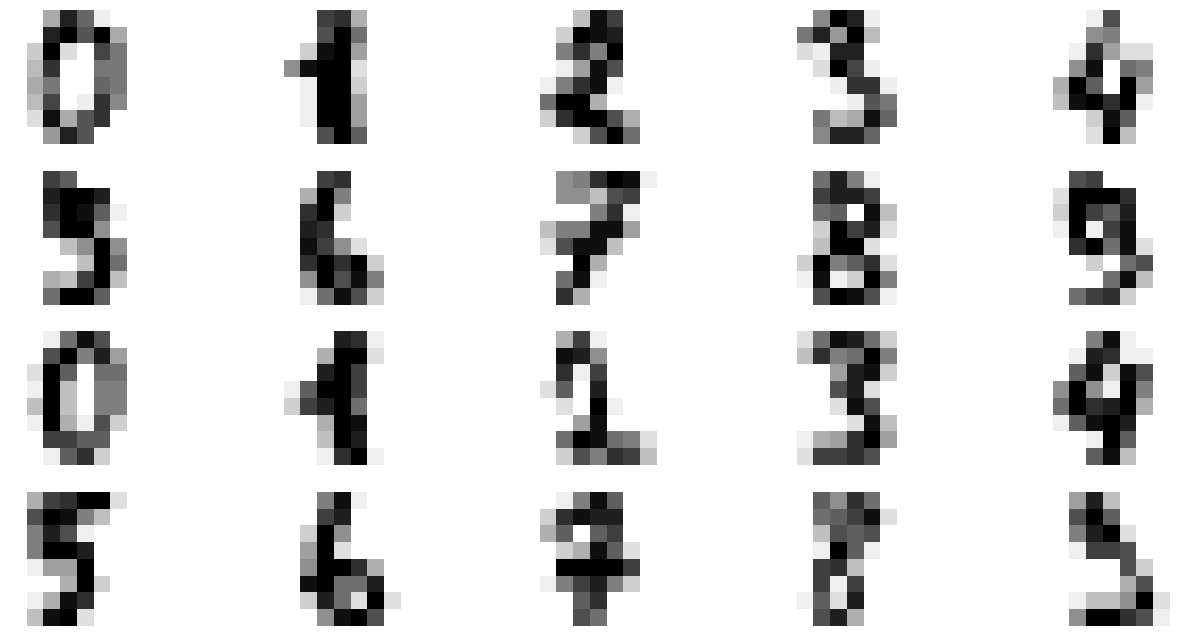

In [3]:
sample = digits.images[:20, :]
fig, ax = plt.subplots(4, 5, figsize=(16, 8))
for i in range(20):
    ax.flat[i].imshow(sample[i], cmap='binary')
    ax.flat[i].axis('off')

We can use the default solver for a small number of dimensions.

In [4]:
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
digits.data.shape, proj.shape

((1797, 64), (1797, 2))

We have the digits as a representation in two dimensions.
A common pattern we have been using is that the order of the samples when
we perform `transform` (or any method on `sklearn` objects) is retained,
i.e. the order of the outputs is the same as the order of inputs.
This makes sense for PCA since it is just a matrix multiplication
but this is true for *almost all* operation in `sklearn`.

Since we have the same order of the samples in two dimensions,
and the dataset provides us with the correct labels for the digits,
we can plot each digit with a specific color and its label.

To speed up plotting we scale the data in our projection for it
to fit in a unit square, a square between $(0, 0)$ and $(1, 1)$.

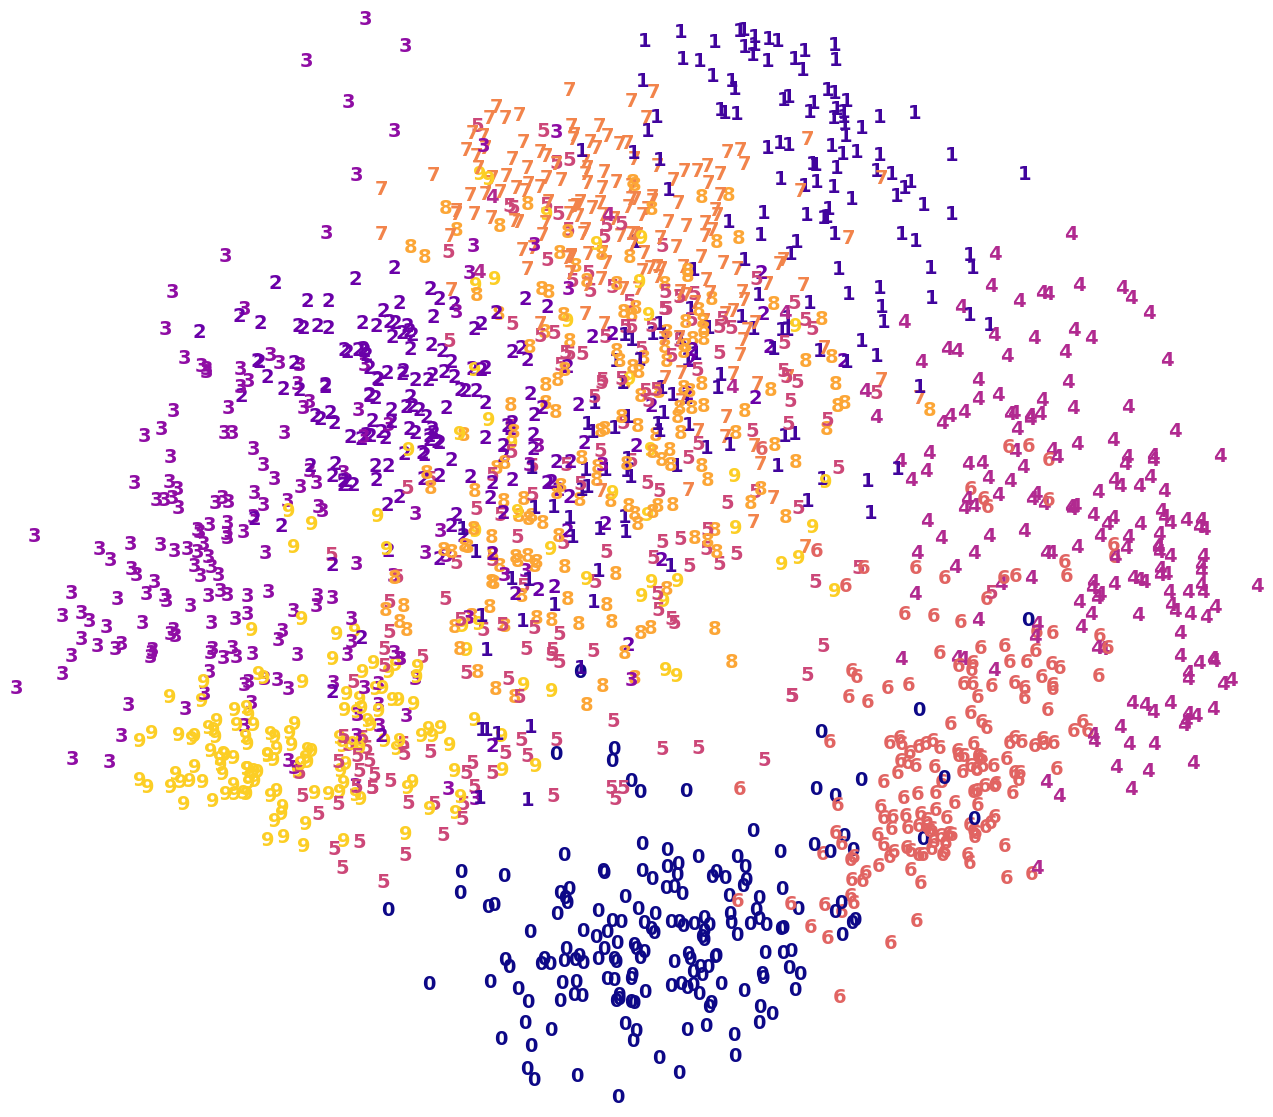

In [5]:
x_min, x_max = np.min(proj, axis=0), np.max(proj, axis=0)
proj_norm = (proj - x_min) / (x_max - x_min)

fig, ax = plt.subplots(figsize=(16, 14))
ax.axis('off')
for i in range(len(digits.target)):
    ax.text(proj_norm[i, 0], proj_norm[i, 1], str(digits.target[i]),
            color=plt.cm.plasma(digits.target[i] / 10),
            fontdict=dict(size=14, weight='bold'))

That may look colorful but isn't very promising.
We can see the $5$ and $8$ or $1$ and $7$ are very related to each other,
which is what we expect since we know how digits look.
The separation between classes is very poor nevertheless.

Let's build the full PCA (on all dimensions which is the default)
and see the cumulative explained variance.
This should give us an idea of where we went wrong.

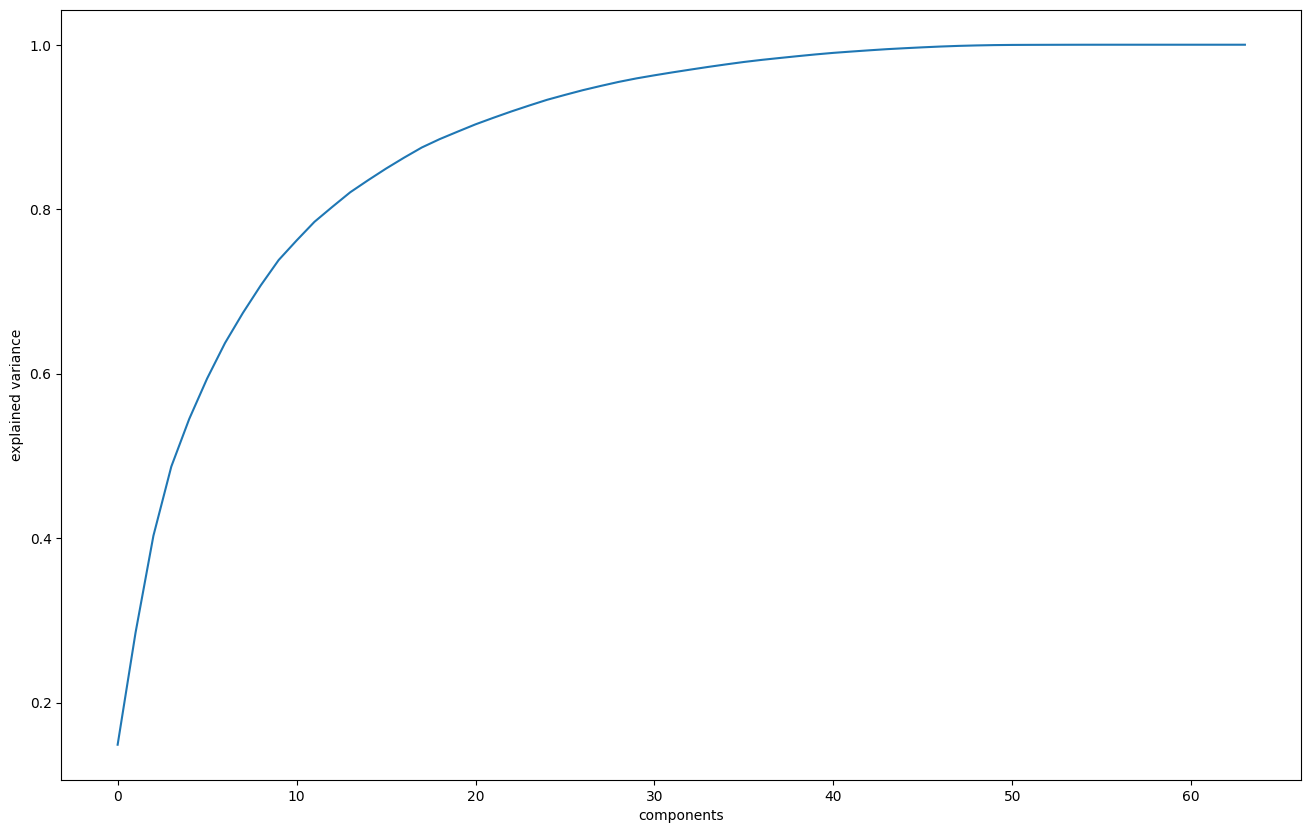

In [6]:
pca = PCA().fit(digits.data)
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='components', ylabel='explained variance');

Only $2$ components do a very bad job of explaining the dataset,
even $10$ components would do a bad job.
Hence our earlier exercise with $4$ dimensions would still
be impossible with the knowledge of PCA.
PCA will not allow us to visualize this dataset.

The issue with the digits happens because PCA is a technique
that depends on the linearity of the dimensions it works with.
Relations between digits that are non-linear,
e.g. two open spaces means an $8$, one open space means a $6$ or a $9$,
no open spaces within the digit means anything else;
these cannot be captured by PCA.

The cumulative variance graph will *often* increase very fast when we deal
with linear problems and will take a long time to increase,
such as the graph just above, for non-linear problem.
Although that is not an authoritative rule.
One can find linear problems where cumulative variance increases
slowly (e.g. noise in every dimension) or a non-linear problem
in which the cumulative variance increases slowly
(e.g. a dataset of images of the letters B and Z).

One can only authoritatively tell whether a problem is
linear or non-linear by understanding the problem.
Note that since the same dataset can be used to solve
several problems it may be the case that a single dataset
can be used for linear and non-linear problems,
depending on how the problem itself is defined.

All that being said, plotting the cumulative variance of the PCA
application is often a good way to begin to understand a dataset.

As for the digits, we will need to find a different technique
to plot their relations.

# References

[SciKit Learn - Dimensionality Reduction][1]

[1]: https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html